## План рабочей тетради:

- [ 01. Loading modules](#1)
- [ 02. Loading data](#2)
- [ 03. Select guesses](#3)
    - функция формирования признаков из модуля FeatureEngineering на основании выбранных гипотез в списке all_guesses.
- [ 04. List all guesses](#4)
    - список всех гипотез.
- [ 05. Remote Control](#5)
    - вся работа связанная с отбором признаков, выбором алгоритмов модели, механизмов для построения моделей происходит в одной ячейке ноутбука, что искючает риски возникновения неконтролируемых данных и моделей.
- [ 06. Statistical data](#6)
- [ 07. Converted data](#7)
- [ 08. Interpretation](#8)
- [ 09. Stacking](#9)
- [ 10. Saving final data](#10)

### 01. Loading modules <a class='anchor' id='1'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

from scipy.stats import gmean, rankdata

from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

import shap
shap.initjs()

import warnings
warnings.simplefilter("ignore")

pd.options.display.max_columns = 200

from modules.ModelSelection import ModelSelection as MS
from modules.FeatureEngineering import FeatureEngineering as FE

### 02. Loading data <a class='anchor' id='2'>

In [3]:
train = pd.read_csv('data/train.csv')
final = pd.read_csv('data/test.csv')

client_profile = pd.read_csv('data/client_profile.csv')
applications_history = pd.read_csv('data/applications_history.csv')
bki = pd.read_csv('data/bki.csv')

data_fool = pd.concat([train, final], axis=0)
data_fool = data_fool.reset_index(drop=True)

### 03. Select guesses <a class='anchor' id='3'>

In [4]:
# функция формирования признаков из модуля FeatureEngineering 
# на основании выбранных гипотез в списке all_guesses

def select_guesses(data, guess=0):
    
    if guess == 0:
        pass
# **********

    elif 'cp_01' in guess:
        cp = FE(client_profile).cp_preprocessing()
        data = data.merge(cp, how='left', on='APPLICATION_NUMBER')
        data = FE(data).label_encoder()
    elif 'cp_02' in guess:
        cp = FE(client_profile).cp_preprocessing()
        data = data.merge(cp, how='left', on='APPLICATION_NUMBER')
        data = FE(data).one_hot_encoder()
    elif 'cp_03' in guess:
        cp = FE(client_profile).cp_preprocessing()
        data = data.merge(cp, how='left', on='APPLICATION_NUMBER')
        data = FE(data).frequency_encoder()
    if 'cp_04' in guess:
        data = FE(data).cp_prob_rating()
    
    if 'cp_08' in guess:
        data = FE(data).cp_age_mean_salary()   
    if 'cp_09' in guess:
        data = FE(data).cp_age_mean_annuity()
    if 'cp_10' in guess:
        data = FE(data).cp_age_mean_credit()
    if 'cp_11' in guess:
        data = FE(data).cp_salary_ratio_age()  
    if 'cp_12' in guess:
        data = FE(data).cp_annuity_ratio_age()
    if 'cp_13' in guess:
        data = FE(data).cp_credit_ratio_age()
    if 'cp_14' in guess:
        data = FE(data).cp_age_mean_rating1()    
    if 'cp_15' in guess:
        data = FE(data).cp_age_mean_rating2() 
    if 'cp_16' in guess:
        data = FE(data).cp_age_mean_rating3() 
    if 'cp_17' in guess:
        data = FE(data).cp_rating1_ratio_age()
    if 'cp_18' in guess:
        data = FE(data).cp_prob_rating1_ratio_age() 
    if 'cp_19' in guess:
        data = FE(data).cp_rating2_ratio_age()
    if 'cp_20' in guess:
        data = FE(data).cp_prob_rating2_ratio_age() 
    if 'cp_21' in guess:
        data = FE(data).cp_rating3_ratio_age()
    if 'cp_22' in guess:
        data = FE(data).cp_prob_rating3_ratio_age() 
    if 'cp_23' in guess:
        data = FE(data).cp_salary_ratio_job()
    if 'cp_24' in guess:
        data = FE(data).cp_annuity_ratio_job()
    if 'cp_25' in guess:
        data = FE(data).cp_credit_ratio_job()
    if 'cp_26' in guess:
        data = FE(data).cp_rating1_ratio_job()
    if 'cp_27' in guess:
        data = FE(data).cp_prob_rating1_ratio_job()
    if 'cp_28' in guess:
        data = FE(data).cp_rating2_ratio_job()
    if 'cp_29' in guess:
        data = FE(data).cp_prob_rating2_ratio_job()
    if 'cp_30' in guess:
        data = FE(data).cp_rating3_ratio_job()
    if 'cp_31' in guess:
        data = FE(data).cp_prob_rating3_ratio_job()
    if 'cp_32' in guess:
        data = FE(data).cp_salary_ratio_car()
    if 'cp_33' in guess:
        data = FE(data).cp_annuity_ratio_car()
    if 'cp_34' in guess:
        data = FE(data).cp_credit_ratio_car()
    if 'cp_35' in guess:
        data = FE(data).cp_rating1_ratio_car()
    if 'cp_36' in guess:
        data = FE(data).cp_rating2_ratio_car()
    if 'cp_37' in guess:
        data = FE(data).cp_rating3_ratio_car()
    if 'cp_38' in guess:
        data = FE(data).cp_edu_mean_salary()
    if 'cp_39' in guess:
        data = FE(data).cp_edu_mean_annuity()
    if 'cp_40' in guess:
        data = FE(data).cp_edu_mean_credit()
    if 'cp_41' in guess:
        data = FE(data).cp_edu_mean_rating1()
    if 'cp_42' in guess:
        data = FE(data).cp_edu_mean_rating2()
    if 'cp_43' in guess:
        data = FE(data).cp_edu_mean_rating3()
    if 'cp_44' in guess:
        data = FE(data).cp_salary_ratio_region()
    if 'cp_45' in guess:
        data = FE(data).cp_annuity_ratio_region()
    if 'cp_46' in guess:
        data = FE(data).cp_credit_ratio_region()
    if 'cp_47' in guess:
        data = FE(data).cp_rating1_ratio_region()
    if 'cp_48' in guess:
        data = FE(data).cp_rating2_ratio_region()
    if 'cp_49' in guess:
        data = FE(data).cp_rating3_ratio_region()
    if 'cp_50' in guess:
        data = FE(data).cp_rating_min()
    if 'cp_51' in guess:
        data = FE(data).cp_prob_rating_min() 
    if 'cp_52' in guess:
        data = FE(data).cp_rating_max()
    if 'cp_53' in guess:
        data = FE(data).cp_prob_rating_max()
    if 'cp_54' in guess:
        data = FE(data).cp_rating_mean()
    if 'cp_55' in guess:
        data = FE(data).cp_prob_rating_mean()
    if 'cp_56' in guess:
        data = FE(data).cp_rating_prod()
    if 'cp_57' in guess:
        data = FE(data).cp_prob_rating_prod()
    if 'cp_58' in guess:
        data = FE(data).cp_rating_balance()
    if 'cp_59' in guess:
        data = FE(data).cp_prob_rating_balance()
    if 'cp_60' in guess:
        data = FE(data).cp_rating1_prod_credit()
    if 'cp_61' in guess:
        data = FE(data).cp_rating2_prod_credit()
    if 'cp_62' in guess:
        data = FE(data).cp_rating3_prod_credit()
    if 'cp_63' in guess:
        data = FE(data).cp_rating1_prod_annuity()
    if 'cp_64' in guess:
        data = FE(data).cp_rating2_prod_annuity()
    if 'cp_65' in guess:
        data = FE(data).cp_rating3_prod_annuity()
    if 'cp_66' in guess:
        data = FE(data).cp_credit_ratio_annuity()
    if 'cp_67' in guess:
        data = FE(data).cp_credit_ratio_salary()
    if 'cp_68' in guess:
        data = FE(data).cp_salary_diff_annuity()
    if 'cp_69' in guess:
        data = FE(data).cp_age_diff_car()
    if 'cp_70' in guess:
        data = FE(data).cp_age_diff_job()
    if 'cp_71' in guess:
        data = FE(data).cp_job_ratio_car()
    if 'cp_72' in guess:
        data = FE(data).cp_gender_min_salary()
    if 'cp_73' in guess:
        data = FE(data).cp_gender_max_salary()
    if 'cp_74' in guess:
        data = FE(data).cp_age_prod_credit_term()  
         
# **********

    if 'ap_01' in guess:
        ap = FE(applications_history).ap_annuity_min()
        data = data.merge(ap, how='left', on='APPLICATION_NUMBER')
    if 'ap_02' in guess:
        ap = FE(applications_history).ap_annuity_approved_min()
        data = data.merge(ap, how='left', on='APPLICATION_NUMBER')
    if 'ap_03' in guess:
        ap = FE(applications_history).ap_annuity_max()
        data = data.merge(ap, how='left', on='APPLICATION_NUMBER')
    if 'ap_04' in guess:
        ap = FE(applications_history).ap_annuity_approved_max()
        data = data.merge(ap, how='left', on='APPLICATION_NUMBER')
    if 'ap_05' in guess:
        ap = FE(applications_history).ap_annuity_sum()
        data = data.merge(ap, how='left', on='APPLICATION_NUMBER')
    if 'ap_06' in guess:
        ap = FE(applications_history).ap_annuity_approved_sum()
        data = data.merge(ap, how='left', on='APPLICATION_NUMBER')
    if 'ap_07' in guess:
        ap = FE(applications_history).ap_credit_min()
        data = data.merge(ap, how='left', on='APPLICATION_NUMBER')
    if 'ap_08' in guess:
        ap = FE(applications_history).ap_credit_approved_min()
        data = data.merge(ap, how='left', on='APPLICATION_NUMBER')
    if 'ap_09' in guess:
        ap = FE(applications_history).ap_credit_max() 
        data = data.merge(ap, how='left', on='APPLICATION_NUMBER')
    if 'ap_10' in guess:
        ap = FE(applications_history).ap_credit_approved_max() 
        data = data.merge(ap, how='left', on='APPLICATION_NUMBER')
    if 'ap_11' in guess:
        ap = FE(applications_history).ap_credit_sum()
        data = data.merge(ap, how='left', on='APPLICATION_NUMBER')
    if 'ap_12' in guess:
        ap = FE(applications_history).ap_credit_approved_sum()
        data = data.merge(ap, how='left', on='APPLICATION_NUMBER')
    if 'ap_13' in guess:
        ap = FE(applications_history).ap_payment_min()
        data = data.merge(ap, how='left', on='APPLICATION_NUMBER')
    if 'ap_14' in guess:
        ap = FE(applications_history).ap_payment_approved_min()
        data = data.merge(ap, how='left', on='APPLICATION_NUMBER')
    if 'ap_15' in guess:
        ap = FE(applications_history).ap_payment_max()
        data = data.merge(ap, how='left', on='APPLICATION_NUMBER')
    if 'ap_16' in guess:
        ap = FE(applications_history).ap_payment_approved_max()
        data = data.merge(ap, how='left', on='APPLICATION_NUMBER')
    if 'ap_17' in guess:
        ap = FE(applications_history).ap_payment_sum()
        data = data.merge(ap, how='left', on='APPLICATION_NUMBER')
    if 'ap_18' in guess:
        ap = FE(applications_history).ap_payment_approved_sum()
        data = data.merge(ap, how='left', on='APPLICATION_NUMBER')
# **********
        
    if 'bk_01' in guess:
        bk = FE(bki).bk_credit_min()
        data = data.merge(bk, how='left', on='APPLICATION_NUMBER')
    if 'bk_02' in guess:
        bk = FE(bki).bk_credit_active_min()
        data = data.merge(bk, how='left', on='APPLICATION_NUMBER')
    if 'bk_03' in guess:
        bk = FE(bki).bk_credit_max()
        data = data.merge(bk, how='left', on='APPLICATION_NUMBER')
    if 'bk_04' in guess:
        bk = FE(bki).bk_credit_active_max()
        data = data.merge(bk, how='left', on='APPLICATION_NUMBER')
    if 'bk_05' in guess:
        bk = FE(bki).bk_credit_sum()
        data = data.merge(bk, how='left', on='APPLICATION_NUMBER')
    if 'bk_06' in guess:
        bk = FE(bki).bk_credit_active_sum()
        data = data.merge(bk, how='left', on='APPLICATION_NUMBER')
    
    return data

### 04. List all guesses <a class='anchor' id='4'>

In [5]:
# Список всех гипотез. 
# Выбор производится раскомментированием строк.

# le - FeatureEngineering().label_encoder()
# oe - FeatureEngineering().one_hot_encoder()
# fe - FeatureEngineering().frequency_encoder()
# tr - train: pd.DataFrame
# cp - client_profile: pd.DataFrame
# ap - applications_history: pd.DataFrame
# bk - bki: pd.DataFrame
# py - payments: pd.DataFrame
                                                     # до тюнинга #  без prob #  c prob   # c preproc #     
all_guesses = [                                      # xgb|lgb|cb #xgb|lgb|cb #xgb|lgb|cb #xgb|lgb|cb #
#     'cp_01', # tr_&_cp_le                           -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_02', # tr_&_cp_oe                           -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_03', # tr_&_cp_fe                           - + | + | + # + | + | + # + | + | + # + | + | + #
#     'cp_04', # cp_prob_rating                       - + | + | + #   |   |   # + | + | + # + | + | + #
    
#     'cp_08', # cp_age_mean_salary                   - + | + | + # + | + | + # + | + |   #   | + | + #
#     'cp_09', # cp_age_mean_annuity                  -   |   | + # + |   |   #   |   |   #   |   |   #
#     'cp_10', # cp_age_mean_credit                   - + |   |   # + |   | + #   |   | + #   | + |   #
#     'cp_11', # cp_salary_ratio_age                  -   |   |   # + |   | + #   |   |   #   |   |   #
#     'cp_12', # cp_annuity_ratio_age                 -   |   | + #   |   |   #   |   |   #   |   |   #
#     'cp_13', # cp_credit_ratio_age                  - + |   | + # + | + |   # + |   |   # + | + |   #
#     'cp_14', # cp_age_mean_rating1                  - + | + | + #   |   |   #   |   | + #   |   |   #
#     'cp_15', # cp_age_mean_rating2                  -   |   |   #   | + |   # + | + |   # + | + |   #
#     'cp_16', # cp_age_mean_rating3                  -   |   |   # + |   |   # + |   |   #   |   |   #
#     'cp_17', # cp_rating1_ratio_age                 - + | + |   # + |   |   #   |   | + #   |   |   #
#     'cp_18', # cp_prob_rating1_ratio_age            - + | + |   #   |   |   #   |   |   #   |   |   #
#     'cp_19', # cp_rating2_ratio_age                 -   |   | + # + |   |   #   |   |   #   |   |   #
#     'cp_20', # cp_prob_rating2_ratio_age            -   |   |   #   |   |   #   |   | + #   |   |   #
#     'cp_21', # cp_rating3_ratio_age                 -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_22', # cp_prob_rating3_ratio_age            -   |   |   #   |   |   #   |   |   #   |   |   #
    
#     'cp_23', # cp_salary_ratio_job                  -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_24', # cp_annuity_ratio_job                 -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_25', # cp_credit_ratio_job                  -   |   |   #   |   |   #   |   |   #   |   | + #
#     'cp_26', # cp_rating1_ratio_job                 -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_27', # cp_prob_rating1_ratio_job            -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_28', # cp_rating2_ratio_job                 -   |   |   #   |   |   #   |   |   #   |   | + #
#     'cp_29', # cp_prob_rating2_ratio_job            - + |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_30', # cp_rating3_ratio_job                 -   |   |   #   |   |   #   |   | + #   |   |   #
#     'cp_31', # cp_prob_rating3_ratio_job            -   |   |   #   |   |   #   |   |   #   |   |   #
    
#     'cp_32', # cp_salary_ratio_car                  -   |   |   #   |   |   #   |   |   #   |   | + #
#     'cp_33', # cp_annuity_ratio_car                 -   |   |   #   |   | + #   |   |   #   |   | + #
#     'cp_34', # cp_credit_ratio_car                  -   |   |   # + |   |   #   |   |   #   |   |   #
#     'cp_35', # cp_rating1_ratio_car                 -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_36', # cp_rating2_ratio_car                 -   |   |   # + |   |   #   |   |   #   |   |   #
#     'cp_37', # cp_rating3_ratio_car                 -   |   |   #   |   |   #   |   |   #   |   |   #
    
#     'cp_38', # cp_edu_mean_salary                   -   |   |   #   |   |   #   |   | + # + |   |   #
#     'cp_39', # cp_edu_mean_annuity                  -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_40', # cp_edu_mean_credit                   -   | + |   #   |   |   #   |   |   #   | + |   #
#     'cp_41', # cp_edu_mean_rating1                  -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_42', # cp_edu_mean_rating2                  -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_43', # cp_edu_mean_rating3                  -   |   |   #   |   |   #   | + |   # + |   |   #
    
#     'cp_44', # cp_salary_ratio_region               -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_45', # cp_annuity_ratio_region              -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_46', # cp_credit_ratio_region               -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_47', # cp_rating1_ratio_region              -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_48', # cp_rating2_ratio_region              -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_49', # cp_rating3_ratio_region              -   |   |   #   |   |   #   |   |   #   |   |   #
    
#     'cp_50', # cp_rating_min                        -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_51', # cp_prob_rating_min                   -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_52', # cp_rating_max                        -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_53', # cp_prob_rating_max                   -   |   |   #   |   |   #   |   |   #   |   | + #
#     'cp_54', # cp_rating_mean                       -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_55', # cp_prob_rating_mean                  -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_56', # cp_rating_prod                       -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_57', # cp_prob_rating_prod                  -   |   |   #   |   |   #   | + |   # + |   |   #
#     'cp_58', # cp_rating_balance                    -   |   |   #   |   |   #   |   |   # + |   |   #
#     'cp_59', # cp_prob_rating_balance               -   |   |   #   |   |   #   |   |   #   |   |   #
    
#     'cp_60', # cp_rating1_prod_credit               -   |   |   #   |   |   #   |   |   # + |   |   #
#     'cp_61', # cp_rating2_prod_credit               -   |   |   #   |   |   #   |   | + #   |   |   #
#     'cp_62', # cp_rating3_prod_credit               -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_63', # cp_rating1_prod_annuity              -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_64', # cp_rating2_prod_annuity              -   |   |   #   |   |   #   |   |   # + |   |   #
#     'cp_65', # cp_rating3_prod_annuity              -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_66', # cp_credit_ratio_annuity              - + | + | + # + | + | + # + | + | + # + | + | + #
#     'cp_67', # cp_credit_ratio_salary               -   |   | + # + |   | + #   |   |   # + |   |   #
#     'cp_68', # cp_salary_diff_annuity               - + | + | + #   | + | + #   | + |   #   |   |   #
    
#     'cp_69', # cp_age_diff_car                      -   |   |   #   |   |   # + | + |   #   |   | + #
#     'cp_70', # cp_age_diff_job                      -   |   |   #   |   |   #   |   |   #   |   |   #
#     'cp_71', # cp_job_ratio_car                     -   |   |   #   |   | + #   |   |   #   | + |   #
#     'cp_72', # cp_gender_min_salary                 - + |   | + # + |   | + #   |   |   # + |   |   #
#     'cp_73', # cp_gender_max_salary                 -   |   |   #   |   |   #   |   |   #   |   | + #
#     'cp_74', # cp_age_prod_credit_term              -   |   |   #   | + | + # + |   |   #   |   |   #                      
# # **********                                   
#     'ap_01', # ap_annuity_min                       -   | + | + # + |   |   # + | + |   # + |   | + #
#     'ap_02', # ap_annuity_approved_min              -   |   |   #   |   |   #   |   |   #   | + |   #
#     'ap_03', # ap_annuity_max                       -   |   | + #   |   |   #   |   |   #   |   |   #
#     'ap_04', # ap_annuity_approved_max              -   |   |   #   |   |   #   |   |   #   |   |   #
#     'ap_05', # ap_annuity_sum                       -   |   |   #   |   |   #   |   |   #   |   |   #
#     'ap_06', # ap_annuity_approved_sum              -   |   |   #   |   |   # + |   |   #   |   |   #
#     'ap_07', # ap_credit_min                        -   |   |   #   |   |   #   |   |   #   |   |   #
#     'ap_08', # ap_credit_approved_min               -   |   |   #   |   |   #   |   |   #   |   |   #
#     'ap_09', # ap_credit_max                        -   |   | + #   |   |   #   |   |   #   |   |   #
#     'ap_10', # ap_credit_approved_max               -   |   |   #   |   |   #   |   |   #   |   |   #
#     'ap_11', # ap_credit_sum                        -   |   |   # + |   |   #   |   |   #   |   |   #
#     'ap_12', # ap_credit_approved_sum               -   |   |   #   |   |   # + |   |   #   |   |   #
#     'ap_13', # ap_payment_min                       -   |   | + #   |   |   #   |   |   #   |   |   #
#     'ap_14', # ap_payment_approved_min              - + |   |   #   |   |   #   |   |   #   |   |   #
#     'ap_15', # ap_payment_max                       - + |   |   #   |   |   #   |   |   #   |   |   #
#     'ap_16', # ap_payment_approved_max              -   |   |   #   | + |   #   |   |   #   |   |   #
#     'ap_17', # ap_payment_sum                       -   |   |   #   |   |   #   |   |   #   |   |   #
#     'ap_18', # ap_payment_approved_sum              -   |   |   #   |   |   #   |   |   #   |   |   #
# # **********    
#     'bk_01', # bk_credit_min                        -   |   |   # + |   |   #   |   |   #   |   |   #
#     'bk_02', # bk_credit_active_min                 -   |   |   #   |   |   #   |   |   #   |   |   #
#     'bk_03', # bk_credit_max                        -   | + |   #   |   |   #   |   |   #   |   |   #
#     'bk_04', # bk_credit_active_min                 -   |   |   #   |   |   #   |   |   # + |   |   #
#     'bk_05', # bk_credit_sum                        -   |   |   #   |   |   #   |   |   #   |   |   #
#     'bk_06', # bk_credit_active_min                 -   |   |   #   |   |   #   |   |   #   |   |   #
# **********
0    
]

### 05. Remote Control <a class='anchor' id='5'>

In [6]:
# датафрейм для сохранения статистики 
stata_model = pd.DataFrame(columns=['time_model', 'train_Hold_Out', 'valid_Hold_Out', 'train_KFold', 
                                    'valid_KFold', 'valid_interval', 'test', 'final'])

# включить механизм обучения моделей                                   
model_select = 1

# выбрать какие именно алгоритмы задействовать
dict_models = {
              'XGBClassifier':          1, 
              'LGBMClassifier':         1, 
              'CatBoostClassifier':     1
             }
#***********************************************

# включить механизм тюнинга гиперпараметров
tuning_parametrs = 0
#***********************************************

# включить механизм отбора значимых признаков
feature_importances = 0
#***********************************************

# включить механизм удаления строк с выбросами
drop_outliers = 0
#***********************************************

# параметры механизма прямого отбора 
best_guesses = []

best_model_xgb = ''
best_oof_preds_xgb = ''
best_roc_auc_xgb = 0#.7340
best_guesses_xgb = ['cp_03', 'cp_04', 'cp_13', 'cp_15', 'cp_38', 'cp_43', 'cp_57', 'cp_58', 'cp_60', 'cp_64', \
                    'cp_66', 'cp_67', 'cp_72', 'ap_01', 'bk_04']

best_model_lgbm = ''
best_oof_preds_lgbm = ''
best_roc_auc_lgbm = 0#.7346
best_guesses_lgbm = ['cp_03', 'cp_04', 'cp_08', 'cp_10', 'cp_13', 'cp_15', 'cp_40', 'cp_66', 'cp_71', \
                     'ap_02']

best_model_cb = ''
best_oof_preds_cb = ''
best_roc_auc_cb = 0#.7335
best_guesses_cb = ['cp_03', 'cp_04', 'cp_08', 'cp_25', 'cp_28', 'cp_32', 'cp_33', 'cp_53', 'cp_66', 'cp_69', \
                   'cp_73', 'ap_01']
#***********************************************

for g in all_guesses:

    if model_select == 1:

        if dict_models['XGBClassifier'] == 1:
            
            new_guesses_xgb = best_guesses_xgb.copy()
            new_guesses_xgb.append(g)
            g_xgb = new_guesses_xgb
            
            data_trans_xgb = select_guesses(data_fool, guess=g_xgb)
            train_xgb, X_xgb, y_xgb, X_final_xgb, final_id = MS.data_separation(data_trans_xgb)

            param_ms_xgb = {'X':X_xgb, 'y':y_xgb, 
                            'stata_model':stata_model}
            
            if tuning_parametrs == 1:
            
                MS(**param_ms_xgb).select_parametrs(name_model='xgb')
                
            else:
                params_xgb = {
                               'n_estimators': 632,
                                'max_depth': 4,
                                'learning_rate': 0.08367885741215793,
                                'min_child_weight': 56,
                                'subsample': 0.9998199611162919,
                                'colsample_bytree': 0.38852029531213667,
                                'colsample_bylevel': 0.8061128026693976,
                                'gamma': 5,
                                'eta': 0.18351218683840054,
                                'reg_lambda': 0.17334928504242075,
                                'reg_alpha': 0.0025675722324817463,
                                }

                if feature_importances == 0 and drop_outliers == 0:

                    guess = (f'xgb_{g_xgb}')
                    param_ms_xgb['guess'] = guess

                    model_xgb, oof_preds_xgb, stata_model = MS(**param_ms_xgb).xgb_classifier(params_xgb)
                    param_ms_xgb['stata_model']  = stata_model

                elif feature_importances == 1 and drop_outliers == 0:

                    guess = (f'imp_xgb_{g_xgb}')
                    param_ms_xgb['guess'] = guess

                    drop_features = MS(**param_ms_xgb).xgb_classifier(params_xgb, 1)
                    X_xgb.drop(drop_features, axis=1, inplace=True)
                    X_final_xgb.drop(drop_features, axis=1, inplace=True)

                    model_xgb, oof_preds_xgb, stata_model = MS(**param_ms_xgb).xgb_classifier(params_xgb)
                    param_ms_xgb['stata_model']  = stata_model

                elif feature_importances == 0 and drop_outliers == 1: 

                    guess = (f'out_xgb_{g_xgb}')
                    param_ms_xgb['guess'] = guess

                    model_xgb, _, _ = MS(**param_ms_xgb).xgb_classifier(params_xgb)

                    data_out_xgb = MS.drop_outliers(train_xgb, model_xgb, loss=0.8)
                    _, X_xgb, y_xgb, _, _ = MS.data_separation(data_out_xgb)

                    model_xgb, oof_preds_xgb, stata_model = MS(**param_ms_xgb).xgb_classifier(params_xgb)
                    param_ms_xgb['stata_model']  = stata_model

                roc_auc_xgb = float(stata_model.loc[stata_model.index==guess, 'valid_KFold'])

                if roc_auc_xgb >= best_roc_auc_xgb:
                    best_roc_auc_xgb = roc_auc_xgb
                    best_guesses_xgb = g_xgb
                    best_model_xgb = model_xgb
                    best_oof_preds_xgb = oof_preds_xgb
                else:
                    stata_model = stata_model.drop(guess, axis=0)

        if dict_models['LGBMClassifier'] == 1:
            
            new_guesses_lgbm = best_guesses_lgbm.copy()
            new_guesses_lgbm.append(g)
            g_lgbm = new_guesses_lgbm
            
            data_trans_lgbm = select_guesses(data_fool, guess=g_lgbm)
            train_lgbm, X_lgbm, y_lgbm, X_final_lgbm, final_id = MS.data_separation(data_trans_lgbm)
            
            param_ms_lgbm = {'X':X_lgbm, 'y':y_lgbm, 
                            'stata_model':stata_model}
            
            if tuning_parametrs == 1:
            
                MS(**param_ms_lgbm).select_parametrs(name_model='lgbm')
                
            else:
                params_lgbm = {
                                'n_estimators': 741,
                                'max_depth': 3,
                                'learning_rate': 0.04794681701069493,
                                'num_leaves': 43,
                                'min_child_weight': 68,
                                'reg_lambda': 0.2072391798825537,
                                'reg_alpha': 0.6194849949961856,
                                }

                if feature_importances == 0 and drop_outliers == 0:

                    guess = (f'lgbm_{g_lgbm}')
                    param_ms_lgbm['guess'] = guess

                    model_lgbm, oof_preds_lgbm, stata_model = MS(**param_ms_lgbm).lgbm_classifier(params_lgbm)
                    param_ms_lgbm['stata_model']  = stata_model

                elif feature_importances == 1 and drop_outliers == 0:

                    guess = (f'imp_lgbm_{g_lgbm}')
                    param_ms_lgbm['guess'] = guess

                    drop_features = MS(**param_ms_lgbm).lgbm_classifier(params_lgbm, 1)
                    X_lgbm.drop(drop_features, axis=1, inplace=True)
                    X_final_lgbm.drop(drop_features, axis=1, inplace=True)

                    model_lgbm, oof_preds_lgbm, stata_model = MS(**param_ms_lgbm).lgbm_classifier(params_lgbm)
                    param_ms_lgbm['stata_model']  = stata_model

                elif feature_importances == 0 and drop_outliers == 1: 

                    guess = (f'out_lgbm_{g_lgbm}')
                    param_ms_lgbm['guess'] = guess

                    model_lgbm, _, _ = MS(**param_ms_lgbm).lgbm_classifier(params_lgbm)

                    data_out_lgbm = MS.drop_outliers(train_lgbm, model_lgbm, loss=0.8)
                    _, X_lgbm, y_lgbm, _, _ = MS.data_separation(data_out_lgbm)

                    model_lgbm, oof_preds_lgbm, stata_model = MS(**param_ms_lgbm).lgbm_classifier(params_lgbm)
                    param_ms_lgbm['stata_model']  = stata_model

                roc_auc_lgbm = float(stata_model.loc[stata_model.index==guess, 'valid_KFold'])

                if roc_auc_lgbm > best_roc_auc_lgbm:
                    best_roc_auc_lgbm = roc_auc_lgbm
                    best_guesses_lgbm = g_lgbm
                    best_model_lgbm = model_lgbm
                    best_oof_preds_lgbm = oof_preds_lgbm
                else:
                    stata_model = stata_model.drop(guess, axis=0)

        if dict_models['CatBoostClassifier'] == 1:
            
            new_guesses_cb = best_guesses_cb.copy()
            new_guesses_cb.append(g)
            g_cb = new_guesses_cb
            
            data_trans_cb = select_guesses(data_fool, guess=g_cb)
            train_cb, X_cb, y_cb, X_final_cb, final_id = MS.data_separation(data_trans_cb)

            param_ms_cb = {'X':X_cb, 'y':y_cb, 
                           'stata_model':stata_model}
            
            if tuning_parametrs == 1:
            
                MS(**param_ms_cb).select_parametrs(name_model='cb')
                
            else:
                params_cb = {
                            'n_estimators': 625,
                            'max_depth': 5,
                            'learning_rate': 0.07141274449479763,
                            'max_bin': 78,
                            'l2_leaf_reg': 10,
                            'thread_count': 2,
                             }

                if feature_importances == 0 and drop_outliers == 0:

                    param_ms_cb = {'X':X_cb, 'y':y_cb, 
                                   'stata_model':stata_model}

                    guess = (f'cb_{g_cb}')
                    param_ms_cb['guess'] = guess

                    model_cb, oof_preds_cb, stata_model = MS(**param_ms_cb).cb_classifier(params_cb)
                    param_ms_cb['stata_model']  = stata_model

                elif feature_importances == 1 and drop_outliers == 0:

                    guess = (f'imp_cb_{g_cb}')
                    param_ms_cb['guess'] = guess

                    drop_features = MS(**param_ms_cb).cb_classifier(params_cb, 1)
                    X_cb.drop(drop_features, axis=1, inplace=True)
                    X_final_cb.drop(drop_features, axis=1, inplace=True)

                    model_cb, oof_preds_cb, stata_model = MS(**param_ms_cb).cb_classifier(params_cb)
                    param_ms_cb['stata_model'] = stata_model

                elif feature_importances == 0 and drop_outliers == 1: 

                    guess = (f'out_cb_{g_cb}')
                    param_ms_cb['guess'] = guess

                    model_cb, _, _ = MS(**param_ms_cb).cb_classifier(params_cb)

                    data_out_cb = MS.drop_outliers(train_cb, model_cb, loss=0.8)
                    _, X_cb, y_cb, _, _ = MS.data_separation(data_out_cb)

                    model_cb, oof_preds_cb, stata_model = MS(**param_ms_cb).cb_classifier(params_cb)
                    param_ms_cb['stata_model']  = stata_model

                roc_auc_cb = float(stata_model.loc[stata_model.index==guess, 'valid_KFold'])

                if roc_auc_cb >= best_roc_auc_cb:
                    best_roc_auc_cb = roc_auc_cb
                    best_guesses_cb = g_cb
                    best_model_cb = model_cb
                    best_oof_preds_cb = oof_preds_cb
                else:
                    stata_model = stata_model.drop(guess, axis=0)
                    
    else:
        new_guesses = best_guesses.copy()
        new_guesses.append(g)
        g = new_guesses
            
        data_trans = select_guesses(data_fool, guess=g)
        data_trans = data_trans.reset_index(drop=True)
        data_trans = data_trans.replace(np.inf, np.nan)
        data_trans = data_trans.replace(-np.inf, np.nan)

        best_guesses = g

[0]	validation_0-auc:0.63973	validation_1-auc:0.64168
[100]	validation_0-auc:0.74523	validation_1-auc:0.74101
[200]	validation_0-auc:0.75813	validation_1-auc:0.74212
[300]	validation_0-auc:0.76683	validation_1-auc:0.74422
[400]	validation_0-auc:0.77355	validation_1-auc:0.74506
[440]	validation_0-auc:0.77474	validation_1-auc:0.74505
Training until validation scores don't improve for 50 rounds
[100]	training's auc: 0.730784	training's binary_logloss: 0.254136	valid_1's auc: 0.735785	valid_1's binary_logloss: 0.257683
[200]	training's auc: 0.740879	training's binary_logloss: 0.250422	valid_1's auc: 0.741023	valid_1's binary_logloss: 0.255292
Early stopping, best iteration is:
[198]	training's auc: 0.740781	training's binary_logloss: 0.250465	valid_1's auc: 0.741111	valid_1's binary_logloss: 0.255322
0:	test: 0.6610495	test1: 0.6668573	best: 0.6668573 (0)	total: 69.8ms	remaining: 43.6s
100:	test: 0.7317263	test1: 0.7353332	best: 0.7353332 (100)	total: 1.94s	remaining: 10.1s
200:	test: 0.74

### 06. Statistical data <a class='anchor' id='6'>

In [7]:
stata_model

,time_model,train_Hold_Out,valid_Hold_Out,train_KFold,valid_KFold,valid_interval,test,final
"xgb_['cp_03', 'cp_04', 'cp_13', 'cp_15', 'cp_38', 'cp_43', 'cp_57', 'cp_58', 'cp_60', 'cp_64', 'cp_66', 'cp_67', 'cp_72', 'ap_01', 'bk_04', 0]",56.8,0.7528,0.7767,0.7709,0.734,0.727/0.74,0.7648,NaN
"lgbm_['cp_03', 'cp_04', 'cp_08', 'cp_10', 'cp_13', 'cp_15', 'cp_40', 'cp_66', 'cp_71', 'ap_02', 0]",11.5,0.7539,0.7745,0.7682,0.7346,0.729/0.739,0.7665,NaN
"cb_['cp_03', 'cp_04', 'cp_08', 'cp_25', 'cp_28', 'cp_32', 'cp_33', 'cp_53', 'cp_66', 'cp_69', 'cp_73', 'ap_01', 0]",67.5,0.7628,0.7817,0.782,0.7335,0.727/0.739,0.7746,NaN


In [9]:
stata_model

,time_model,train_Hold_Out,valid_Hold_Out,train_KFold,valid_KFold,valid_interval,test,final
xgb_['cp_03'],34.1,0.7283,0.7503,0.7401,0.7204,0.714/0.727,0.7411,NaN
"xgb_['cp_03', 'cp_04']",36.7,0.7351,0.7566,0.7482,0.7237,0.718/0.73,0.748,NaN
"xgb_['cp_03', 'cp_04', 'cp_13']",40.1,0.735,0.7564,0.7472,0.7239,0.718/0.729,0.7473,NaN
"xgb_['cp_03', 'cp_04', 'cp_13', 'cp_15']",43.3,0.7379,0.76,0.7503,0.7244,0.719/0.73,0.7498,NaN
"xgb_['cp_03', 'cp_04', 'cp_13', 'cp_15', 'cp_38']",43.2,0.7389,0.7621,0.7508,0.7244,0.719/0.729,0.7502,NaN
"xgb_['cp_03', 'cp_04', 'cp_13', 'cp_15', 'cp_38', 'cp_43']",41.9,0.7358,0.7567,0.7487,0.7246,0.719/0.73,0.7482,NaN
"xgb_['cp_03', 'cp_04', 'cp_13', 'cp_15', 'cp_38', 'cp_43', 'cp_57']",43.4,0.7334,0.7551,0.7457,0.7246,0.718/0.73,0.7457,NaN
"xgb_['cp_03', 'cp_04', 'cp_13', 'cp_15', 'cp_38', 'cp_43', 'cp_57', 'cp_58']",44.3,0.7382,0.7611,0.7519,0.7247,0.717/0.731,0.7512,NaN
"xgb_['cp_03', 'cp_04', 'cp_13', 'cp_15', 'cp_38', 'cp_43', 'cp_57', 'cp_58', 'cp_60']",45.0,0.7364,0.7586,0.7491,0.7251,0.718/0.732,0.75,NaN
"xgb_['cp_03', 'cp_04', 'cp_13', 'cp_15', 'cp_38', 'cp_43', 'cp_57', 'cp_58', 'cp_60', 'cp_64']",49.9,0.7375,0.761,0.752,0.7254,0.718/0.732,0.7512,NaN


In [13]:
stata_model

,time_model,train_Hold_Out,valid_Hold_Out,train_KFold,valid_KFold,valid_interval,test,final
lgbm_['cp_03'],9.9,0.7397,0.7622,0.7538,0.7221,0.715/0.728,0.7515,NaN
"lgbm_['cp_03', 'cp_04']",10.4,0.7423,0.7629,0.7554,0.7254,0.72/0.73,0.7531,NaN
"lgbm_['cp_03', 'cp_04', 'cp_08']",10.3,0.7437,0.7634,0.7566,0.7255,0.72/0.73,0.7549,NaN
"lgbm_['cp_03', 'cp_04', 'cp_08', 'cp_10']",10.6,0.7434,0.7633,0.7573,0.7256,0.719/0.731,0.7553,NaN
"lgbm_['cp_03', 'cp_04', 'cp_08', 'cp_10', 'cp_13']",11.0,0.744,0.7646,0.7578,0.7258,0.72/0.731,0.7558,NaN
"lgbm_['cp_03', 'cp_04', 'cp_08', 'cp_10', 'cp_13', 'cp_15']",11.1,0.7444,0.7652,0.7584,0.726,0.72/0.731,0.7564,NaN
"lgbm_['cp_03', 'cp_04', 'cp_08', 'cp_10', 'cp_13', 'cp_15', 'cp_40']",11.2,0.7444,0.7652,0.7585,0.7261,0.72/0.731,0.7564,NaN
"lgbm_['cp_03', 'cp_04', 'cp_08', 'cp_10', 'cp_13', 'cp_15', 'cp_40', 'cp_66']",11.7,0.7533,0.7744,0.7661,0.7343,0.728/0.74,0.7647,NaN
"lgbm_['cp_03', 'cp_04', 'cp_08', 'cp_10', 'cp_13', 'cp_15', 'cp_40', 'cp_66', 'cp_71']",11.9,0.7526,0.774,0.7664,0.7345,0.728/0.741,0.7646,NaN
"lgbm_['cp_03', 'cp_04', 'cp_08', 'cp_10', 'cp_13', 'cp_15', 'cp_40', 'cp_66', 'cp_71', 'ap_02']",11.7,0.7539,0.7745,0.7682,0.7346,0.729/0.739,0.7665,NaN


In [15]:
stata_model

,time_model,train_Hold_Out,valid_Hold_Out,train_KFold,valid_KFold,valid_interval,test,final
cb_['cp_03'],57.0,0.754,0.7754,0.7711,0.7223,0.714/0.729,0.7642,NaN
"cb_['cp_03', 'cp_04']",56.9,0.7531,0.7721,0.7694,0.7258,0.72/0.731,0.7629,NaN
"cb_['cp_03', 'cp_04', 'cp_08']",56.6,0.7557,0.7741,0.7716,0.7259,0.72/0.731,0.7653,NaN
"cb_['cp_03', 'cp_04', 'cp_08', 'cp_25']",58.2,0.7547,0.7756,0.7722,0.7259,0.721/0.731,0.7664,NaN
"cb_['cp_03', 'cp_04', 'cp_08', 'cp_25', 'cp_28']",59.8,0.754,0.7737,0.7719,0.7259,0.719/0.732,0.7644,NaN
"cb_['cp_03', 'cp_04', 'cp_08', 'cp_25', 'cp_28', 'cp_32']",57.7,0.7549,0.7745,0.7722,0.7259,0.72/0.731,0.7659,NaN
"cb_['cp_03', 'cp_04', 'cp_08', 'cp_25', 'cp_28', 'cp_32', 'cp_33']",60.0,0.7548,0.7742,0.7728,0.7263,0.719/0.732,0.7647,NaN
"cb_['cp_03', 'cp_04', 'cp_08', 'cp_25', 'cp_28', 'cp_32', 'cp_33', 'cp_53']",60.3,0.7557,0.7745,0.774,0.7265,0.721/0.731,0.7662,NaN
"cb_['cp_03', 'cp_04', 'cp_08', 'cp_25', 'cp_28', 'cp_32', 'cp_33', 'cp_53', 'cp_66']",63.6,0.7613,0.7808,0.779,0.7332,0.725/0.74,0.7723,NaN
"cb_['cp_03', 'cp_04', 'cp_08', 'cp_25', 'cp_28', 'cp_32', 'cp_33', 'cp_53', 'cp_66', 'cp_69']",62.9,0.7626,0.7803,0.7795,0.7334,0.727/0.741,0.7734,NaN


### 07. Converted data <a class='anchor' id='7'>

In [21]:
print(X_xgb.shape)
X_xgb.head()

(110093, 32)


,NAME_CONTRACT_TYPE,GENDER,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PROB_RATING_1,PROB_RATING_2,PROB_RATING_3,CREDIT_RATIO_AGE,AGE_MEAN_RATING_2,EDU_MEAN_SALARY,EDU_MEAN_RATING_3,PROB_RATING_PROD,RATING_BALANCE,RATING1_PROD_CREDIT,RATING2_PROD_ANNUITY,CREDIT_RATIO_ANNUITY,CREDIT_RATIO_SALARY,GENDER_MIN_SALARY,AMOUNT_ANNUITY_min,AMT_CREDIT_SUM_Active_max
0,0.904623,0.340918,157500.0,855000.0,25128.0,1.0,0.639872,0.019101,15728.0,1719.0,11.0,0.700784,0.645914,0.716570,0.0,2.0,0.039592,0.054831,0.039526,54.361648,0.540800,155385.898168,0.51550,0.000086,4.197193,599170.547652,16230.521013,34.025788,5.428571,27000.0,6510.015,NaN
1,0.904623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083699,0.082204,0.087717,NaN,NaN,NaN,NaN,0.000604,NaN,NaN,NaN,NaN,NaN,NaN,11349.900,264010.5
2,0.904623,0.659082,135000.0,1006920.0,42660.0,3.0,0.639872,0.026392,21557.0,3618.0,50.0,NaN,0.682149,0.267869,0.0,4.0,0.083699,0.046450,0.126134,46.709653,0.523308,208635.897495,0.50303,0.000490,NaN,NaN,29100.493510,23.603376,7.458667,25650.0,9000.000,1800000.0
3,0.904623,0.340918,180000.0,518562.0,22972.5,1.0,0.639872,0.031329,22338.0,NaN,50.0,NaN,0.171299,0.170446,0.0,0.0,0.083699,0.140848,0.177625,23.214343,0.368542,155385.898168,0.51550,0.002094,NaN,NaN,3935.167908,22.573164,2.880900,27000.0,2450.115,NaN
4,0.904623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083699,0.082204,0.087717,NaN,NaN,NaN,NaN,0.000604,NaN,NaN,NaN,NaN,NaN,NaN,8093.115,22500.0


In [22]:
print(X_lgbm.shape)
X_lgbm.head()

(110093, 27)


,NAME_CONTRACT_TYPE,GENDER,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PROB_RATING_1,PROB_RATING_2,PROB_RATING_3,AGE_MEAN_SALARY,AGE_MEAN_CREDIT,CREDIT_RATIO_AGE,AGE_MEAN_RATING_2,EDU_MEAN_CREDIT,CREDIT_RATIO_ANNUITY,JOB_RATIO_CAR,AMOUNT_ANNUITY_Approved_min
0,0.904623,0.340918,157500.0,855000.0,25128.0,1.0,0.639872,0.019101,15728.0,1719.0,11.0,0.700784,0.645914,0.716570,0.0,2.0,0.039592,0.054831,0.039526,174093.750000,650861.718750,54.361648,0.540800,571503.509551,34.025788,57039.545455,6510.015
1,0.904623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083699,0.082204,0.087717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11349.900
2,0.904623,0.659082,135000.0,1006920.0,42660.0,3.0,0.639872,0.026392,21557.0,3618.0,50.0,NaN,0.682149,0.267869,0.0,4.0,0.083699,0.046450,0.126134,138068.181818,648764.590909,46.709653,0.523308,689619.479089,23.603376,26411.400000,9000.000
3,0.904623,0.340918,180000.0,518562.0,22972.5,1.0,0.639872,0.031329,22338.0,NaN,50.0,NaN,0.171299,0.170446,0.0,0.0,0.083699,0.140848,0.177625,142363.636364,488647.636364,23.214343,0.368542,571503.509551,22.573164,NaN,2450.115
4,0.904623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083699,0.082204,0.087717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10608.390


In [23]:
print(X_cb.shape)
X_cb.head()

(110093, 29)


,NAME_CONTRACT_TYPE,GENDER,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PROB_RATING_1,PROB_RATING_2,PROB_RATING_3,AGE_MEAN_SALARY,CREDIT_RATIO_JOB,RATING_2_RATIO_JOB,SALARY_RATIO_CAR,ANNUITY_RATIO_CAR,PROB_RATING_MAX,CREDIT_RATIO_ANNUITY,AGE_DIFF_CAR,GENDER_MIN_SALARY,AMOUNT_ANNUITY_min
0,0.904623,0.340918,157500.0,855000.0,25128.0,1.0,0.639872,0.019101,15728.0,1719.0,11.0,0.700784,0.645914,0.716570,0.0,2.0,0.039592,0.054831,0.039526,174093.750000,497.382199,0.000376,14318.181818,2284.363636,0.054831,34.025788,11713.0,18000090.0,6510.015
1,0.904623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083699,0.082204,0.087717,NaN,NaN,NaN,NaN,NaN,0.087717,NaN,NaN,NaN,11349.900
2,0.904623,0.659082,135000.0,1006920.0,42660.0,3.0,0.639872,0.026392,21557.0,3618.0,50.0,NaN,0.682149,0.267869,0.0,4.0,0.083699,0.046450,0.126134,138068.181818,278.308458,0.000189,2700.000000,853.200000,0.126134,23.603376,3307.0,117000000.0,9000.000
3,0.904623,0.340918,180000.0,518562.0,22972.5,1.0,0.639872,0.031329,22338.0,NaN,50.0,NaN,0.171299,0.170446,0.0,0.0,0.083699,0.140848,0.177625,142363.636364,NaN,NaN,3600.000000,459.450000,0.177625,22.573164,4088.0,18000090.0,2450.115
4,0.904623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083699,0.082204,0.087717,NaN,NaN,NaN,NaN,NaN,0.087717,NaN,NaN,NaN,8093.115


### 08. Interpretation <a class='anchor' id='8'>

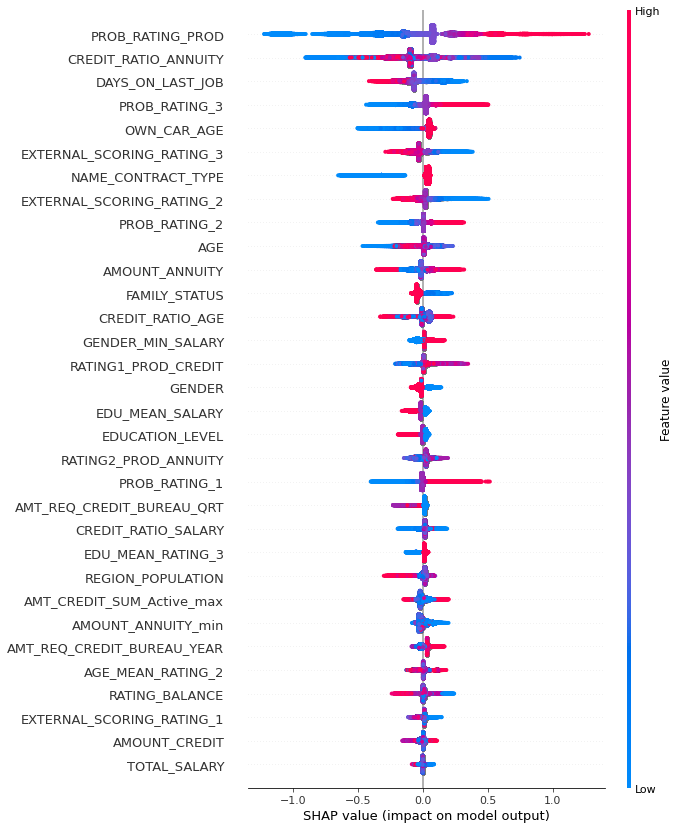

In [8]:
model, X = best_model_xgb, X_xgb
# model, X = best_model_lgbm, X_lgbm
# model, X = best_model_cb, X_cb

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X, max_display=200)

In [25]:
shap.force_plot(explainer.expected_value, shap_values[55, :], X.iloc[55, :])  

### 09. Stacking <a class='anchor' id='9'>

<AxesSubplot:>

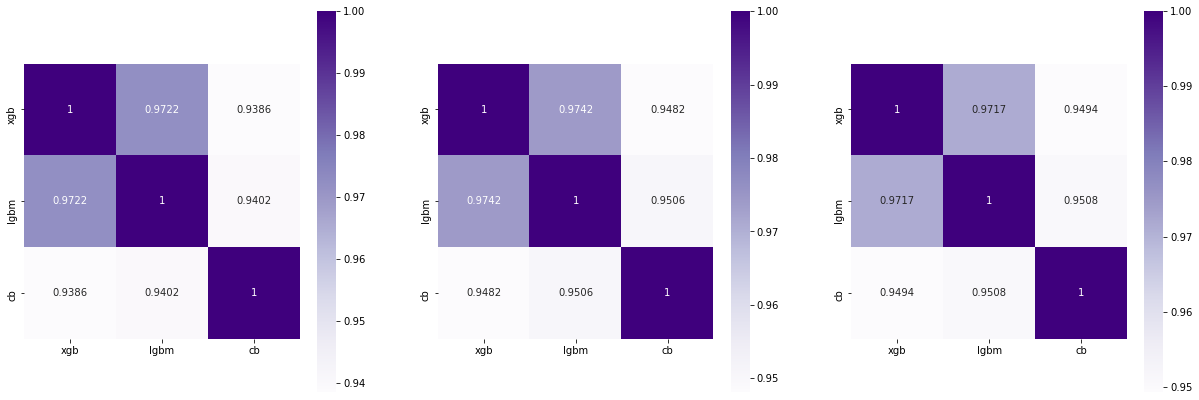

In [9]:
xgb_pred_train = best_model_xgb.predict_proba(X_xgb)[:, 1]
lgbm_pred_train = best_model_lgbm.predict_proba(X_lgbm)[:, 1]
cb_pred_train = best_model_cb.predict_proba(X_cb)[:, 1]

xgb_pred_final = best_model_xgb.predict_proba(X_final_xgb)[:, 1]
lgbm_pred_final = best_model_lgbm.predict_proba(X_final_lgbm)[:, 1]
cb_pred_final = best_model_cb.predict_proba(X_final_cb)[:, 1]

scores_train = pd.DataFrame({
    "xgb": xgb_pred_train,
    "lgbm": lgbm_pred_train,
    "cb": cb_pred_train,
     })

scores_valid = pd.DataFrame({
    "xgb": best_oof_preds_xgb,
    "lgbm": best_oof_preds_lgbm,
    "cb": best_oof_preds_cb,
     })

scores_final = pd.DataFrame({
    "xgb": xgb_pred_final,
    "lgbm": lgbm_pred_final,
    "cb": cb_pred_final,
     })

fig, axes = plt.subplots(1, 3, figsize=(21, 7))
sns.heatmap(scores_train.corr(), annot=True, fmt=".4g", ax=axes[0], square=True, cmap="Purples")
sns.heatmap(scores_valid.corr(), annot=True, fmt=".4g", ax=axes[1], square=True, cmap="Purples")
sns.heatmap(scores_final.corr(), annot=True, fmt=".4g", ax=axes[2], square=True, cmap="Purples")

In [10]:
# Арифмитическое среднее
scores_train_Amean = scores_train.mean(axis=1)
score_train_Amean = roc_auc_score(y_xgb, scores_train_Amean)
print(f"Score_train_Amean = {round(score_train_Amean, 4)}")

Score_train_Amean = 0.768


In [11]:
# Геометрическое среднее
scores_train_Gmean = gmean(scores_train, axis=1)
score_train_Gmean = roc_auc_score(y_xgb, scores_train_Gmean)
print(f"Score_train_Gmean = {round(score_train_Gmean, 4)}")

Score_train_Gmean = 0.7674


In [12]:
model_lr = LogisticRegression(random_state=1)
model_lr.fit(scores_train, y_xgb)

pred_lr = model_lr.predict_proba(scores_train)[:, 1]
lr_score = roc_auc_score(y_xgb, pred_lr)
print(f"Score_LogisticRegression = {round(lr_score, 4)}")

Score_LogisticRegression = 0.7692


In [16]:
scores_general = pd.DataFrame({
    "Amean": scores_final.mean(axis=1),
    "Amean_xgb_lgbm": scores_final[['xgb', 'lgbm']].mean(axis=1),
    "Gmean": gmean(scores_final, axis=1), 
    "Gmean_xgb_lgbm": gmean(scores_final[['xgb', 'lgbm']], axis=1), 
#     "LogReg": model_lr.predict_proba(scores_final)[:, 1],
        })

best_pred = pd.read_csv('predictions/best_pred.csv')
scores_general = pd.concat([scores_general,best_pred],axis=1)
scores_mean = scores_general.mean(axis=1)

### 10. Saving final data <a class='anchor' id='10'>

In [35]:
df_final = pd.DataFrame({'APPLICATION_NUMBER':final_id, 'TARGET':list(scores_mean)})
df_final.to_csv('Yakupova_prediction_stack_mean2_best.csv', index=False, encoding='utf-8')

In [36]:
df_final[df_final['TARGET'] > 0.5]

,APPLICATION_NUMBER,TARGET
132,123492753,0.612887
412,123693693,0.621305
469,123516134,0.519723
585,123446701,0.524010
620,123590530,0.501027
...,...,...
162873,123446952,0.560416
163001,123452884,0.567271
164398,123585520,0.674179
164804,123520637,0.537166
